**Проект по определению перспективного тарифа для телеком-компании «Мегалайн».**<br>
Цель проекта:<br>
Определить, какой из двух тарифных планов («Смарт» или «Ультра») приносит больше прибыли компании, на основе анализа данных о поведении клиентов.

Для начала откроем файлы и изучим их общую информацию

In [ ]:
import pandas as pd

**Таблица calls (информация о звонках)**:<br>
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок

In [ ]:
calls_data = pd.read_csv('calls.csv')
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Таблица internet (информация об интернет-сессиях)**:<br>
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя

In [ ]:
internet_data = pd.read_csv('internet.csv')
internet_data.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Таблица messages (информация о сообщениях)**:<br>
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение

In [ ]:
messages_data = pd.read_csv('messages.csv')
messages_data.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Таблица tariffs (информация о тарифах)**:<br>
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [ ]:
tariffs_data = pd.read_csv('tariffs.csv')
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


**Таблица users (информация о пользователях)**: <br>
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана


In [ ]:
users_data = pd.read_csv('users.csv')
users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Предобработка данных**<br>
Для начала приведем все стобцы с датами к формату дата

In [ ]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')

Ошибки в данных не найденны, поэтому перейдем далее к подготовке данных

Для начала округлю длительность звонков и объем трафика, так же приведк их к целым числам

In [ ]:
import numpy as np

In [ ]:
calls_data['duration'] = np.ceil(calls_data['duration']).astype(int)
internet_data['mb_used'] = np.ceil(internet_data['mb_used']).astype(int)

In [ ]:
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Теперь доавлю столбец с месяцами

In [ ]:
calls_data['month'] = calls_data['call_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month
messages_data['month'] = messages_data['message_date'].dt.month

In [ ]:
calls_data.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Расчетая количество минут, сообщений и трафик по месяцам

In [ ]:
calls_monthly = calls_data.groupby(['user_id', 'month'])['duration'].sum().to_frame()
messages_monthly = messages_data.groupby(['user_id', 'month'])['id'].count().to_frame()
internet_monthly = internet_data.groupby(['user_id', 'month'])['mb_used'].sum().to_frame()

In [ ]:
calls_monthly.head()

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466

In [ ]:
calls_monthly

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

Объединю все данные в одну таблицу

In [ ]:
monthly_data = calls_monthly.join(messages_monthly, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.join(internet_monthly, on=['user_id', 'month'], how='outer')
monthly_data.columns = ['minutes_sum', 'messages_count', 'mb_sum']
monthly_data

minutes_sum  messages_count   mb_sum
user_id month                                      
1000    5            159.0            22.0   2256.0
        6            172.0            60.0  23257.0
        7            340.0            75.0  14016.0
        8            408.0            81.0  14070.0
        9            466.0            57.0  14581.0
...                    ...             ...      ...
1498    10           247.0            42.0  20604.0
1499    9             70.0            11.0   1848.0
        10           449.0            48.0  17809.0
        11           612.0            59.0  17984.0
        12           492.0            66.0  13077.0

[3214 rows x 3 columns]

In [ ]:
monthly_data = monthly_data.reset_index()
monthly_data = monthly_data.merge(users_data, on='user_id', how='left')
monthly_data = monthly_data.merge(tariffs_data, left_on='tariff', right_on='tariff_name', how='left')

In [ ]:
monthly_data.head()

,user_id,month,minutes_sum,messages_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
def calculate_revenue(row):
    minutes_over = max(row['minutes_sum'] - row['minutes_included'], 0)
    messages_over = max(row['messages_count'] - row['messages_included'], 0)
    gb_over = max(np.ceil(row['mb_sum'] / 1024) - row['mb_per_month_included'] / 1024, 0)
    return row['rub_monthly_fee'] + minutes_over * row['rub_per_minute'] + messages_over * row['rub_per_message'] + gb_over * row['rub_per_gb']

In [ ]:
monthly_data['revenue'] = monthly_data.apply(calculate_revenue, axis=1)

In [ ]:
monthly_data.head()

,user_id,month,minutes_sum,messages_count,mb_sum,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


Таким образом, теперь известна помесячная выручка с каждого пользователя

 **Анализ данных**

In [ ]:
grouped_data = monthly_data.groupby(['tariff', 'user_id', 'month']).agg({
    'minutes_sum': 'sum',
    'messages_count': 'sum',
    'mb_sum': 'sum'
}).reset_index()
grouped_data

,tariff,user_id,month,minutes_sum,messages_count,mb_sum
0,smart,1001,11,430.0,0.0,18452.0
1,smart,1001,12,414.0,0.0,14053.0
2,smart,1002,6,117.0,4.0,10871.0
3,smart,1002,7,214.0,11.0,17601.0
4,smart,1002,8,289.0,13.0,20347.0
...,...,...,...,...,...,...
3209,ultra,1495,8,92.0,13.0,2616.0
3210,ultra,1495,9,813.0,82.0,33105.0
3211,ultra,1495,10,1030.0,82.0,29393.0
3212,ultra,1495,11,954.0,79.0,38972.0


In [ ]:
grouped_data = grouped_data.rename(columns={'mb_sum': 'gb_sum'})
grouped_data['gb_sum'] = np.ceil(grouped_data['gb_sum'] / 1024)
grouped_data.head()

,tariff,user_id,month,minutes_sum,messages_count,gb_sum
0,smart,1001,11,430.0,0.0,19.0
1,smart,1001,12,414.0,0.0,14.0
2,smart,1002,6,117.0,4.0,11.0
3,smart,1002,7,214.0,11.0,18.0
4,smart,1002,8,289.0,13.0,20.0


In [ ]:
def stat(data, column):
    mean = data[column].mean()
    variance = np.var(data[column])
    std = np.std(data[column])
    return mean, variance, std

In [ ]:
for tariff in ['smart', 'ultra']:
    tariff_data = grouped_data[grouped_data['tariff'] == tariff]
    print(f'Статистика для тарифа "{tariff}":')
    for column in ['minutes_sum', 'messages_count', 'gb_sum']:
        mean, variance, std = stat(tariff_data, column)
        print(f'{column}:\n Среднее = {mean:.2f}\n Дисперсия = {variance:.2f}\n Стандартное отклонение = {std:.2f}')
    print()

Статистика для тарифа "smart":
minutes_sum:
 Среднее = 417.93
 Дисперсия = 36203.07
 Стандартное отклонение = 190.27
messages_count:
 Среднее = 33.38
 Дисперсия = 796.46
 Стандартное отклонение = 28.22
gb_sum:
 Среднее = 16.36
 Дисперсия = 33.15
 Стандартное отклонение = 5.76

Статистика для тарифа "ultra":
minutes_sum:
 Среднее = 526.62
 Дисперсия = 100771.22
 Стандартное отклонение = 317.44
messages_count:
 Среднее = 49.36
 Дисперсия = 2282.95
 Стандартное отклонение = 47.78
gb_sum:
 Среднее = 19.53
 Дисперсия = 97.24
 Стандартное отклонение = 9.86



Тариф "Смарт":<br>
Минуты разговора:<br>
Пользователи активно используют голосовую связь, в среднем около 418 минут в месяц. Разброс значений довольно велик, что говорит о разнообразном потреблении минут<br>
Сообщения:<br>
Сообщения используются менее активно, чем голосовая связь. Разброс значений также значителен.<br>
Интернет-трафик:<br>
В среднем пользователи используют около 16 Гб интернет-трафика. Разброс значений нормальный.<br>
Тариф "Ультра":<br>
Минуты разговора:<br>
Пользователи активно используют голосовую связь, в среднем около 526 минут в месяц. Разброс значений значительно выше, что говорит о большом разнообразии в потреблении минут.<br>
Сообщения:<br>
Сообщения используются менее активно, чем голосовая связь. Разброс значений также значителен.<br>
Интернет-трафик:<br>
В среднем пользователи используют около 20 Гб интернет-трафика. Разброс значений нормальный.<br>
Пользователи тарифа "Ультра" в среднем более активны во всех видах связи.
Разброс в потреблении услуг, особенно голосовой связи значителен для обоих тарифов.
Пользователи тарифа "Смарт" в среднем превышают лимиты по интернет траффику, так как по тарифу включено 15гб, в отличие от пользователей тарифа "Ультра" в который включено 30гб, и пользователи в среднем не превышают лимит.

In [ ]:
import matplotlib.pyplot as plt
def plot_histograms(data, column, tariff):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, alpha=0.7)
    plt.title(f'Распределение {column} для тарифа "{tariff}"')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

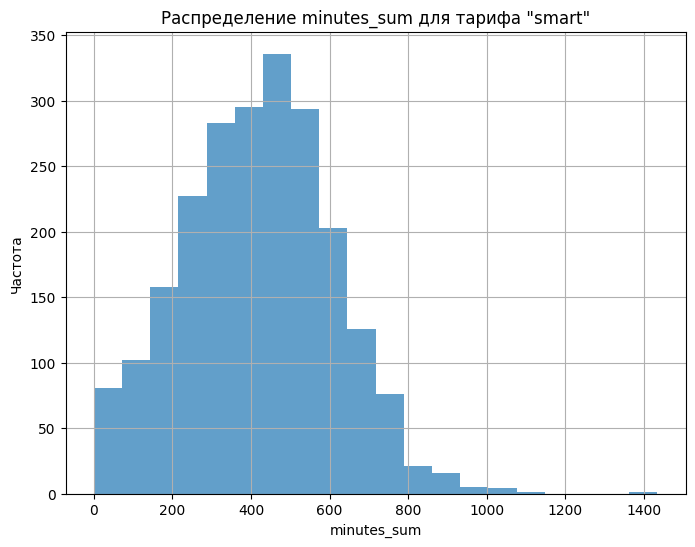

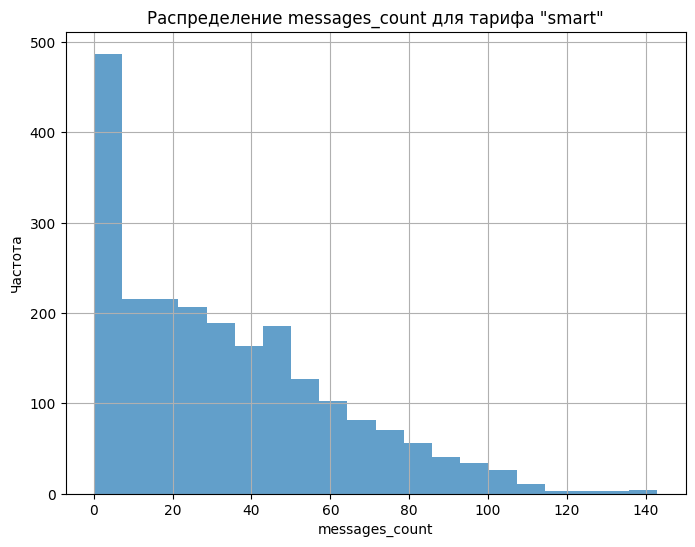

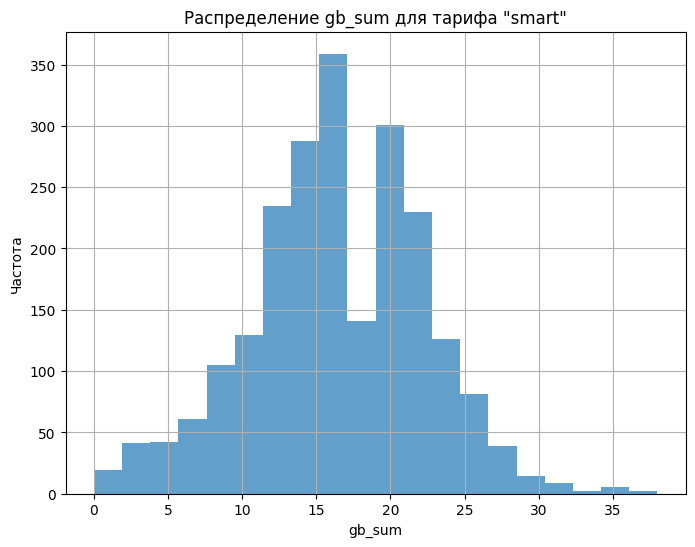

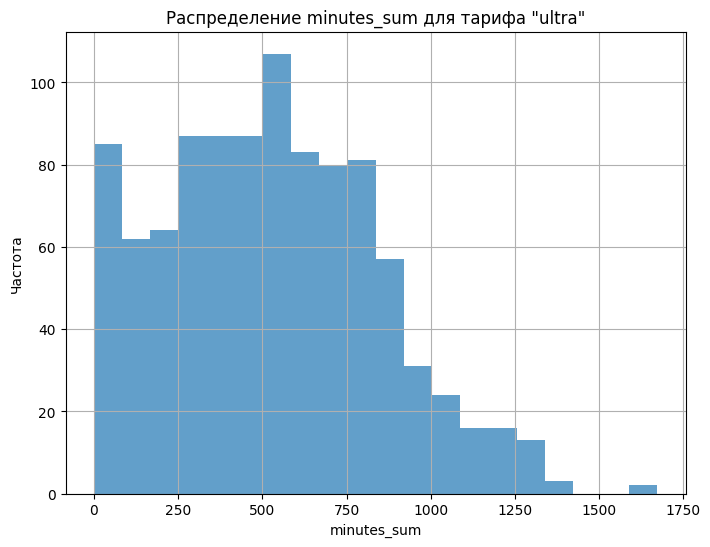

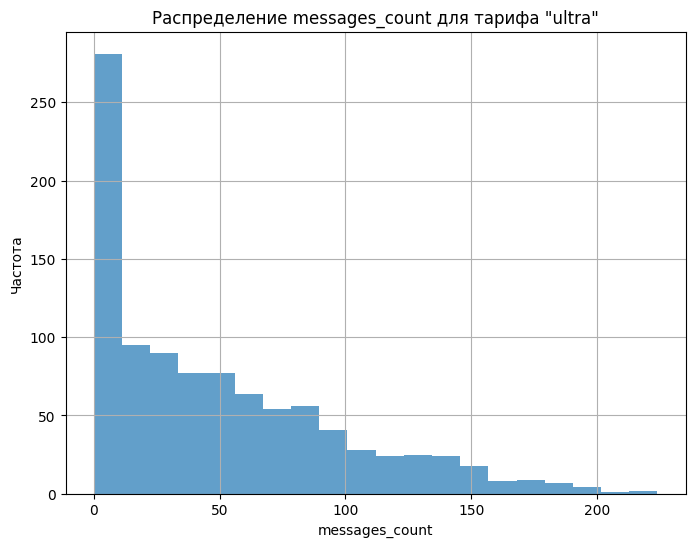

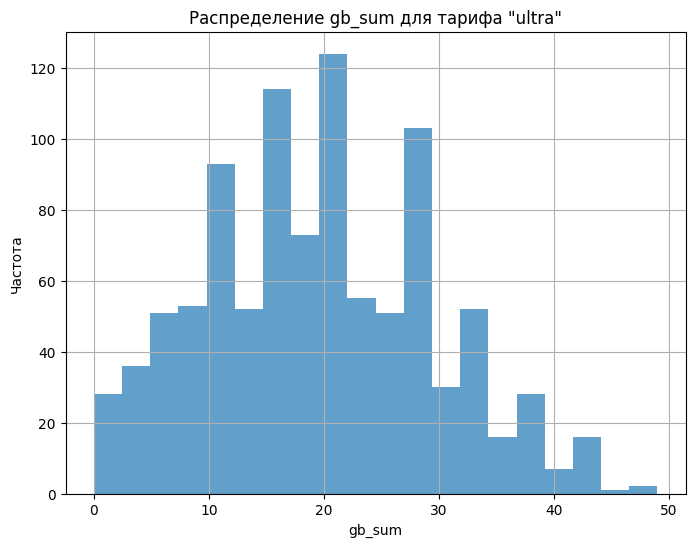

In [ ]:
for tariff in ['smart', 'ultra']:ф
    tariff_data = grouped_data[grouped_data['tariff'] == tariff]
    for column in ['minutes_sum', 'messages_count', 'gb_sum']:
        plot_histograms(tariff_data, column, tariff)


тариф "Смарт":<br>
распределения минут разговора:<br>
Распределение близко к нормальному, но с асимметрией вправо.
Большинство пользователей укладываются в диапазон от 200 до 600 минут в месяц.
Есть значительное количество пользователей, которые превышают лимит в 500 минут, включенный в тариф.
Наличие выбросов говорит о том, что есть пользователи с очень высоким потреблением минут.<br>
распределения количества сообщений:<br>
Распределение сильно скошено вправо.
Большинство пользователей отправляют очень небольшое количество сообщений в месяц.
Небольшая группа пользователей отправляет значительно больше сообщений, что создает длинный хвост в правой части распределения.<br>
распределения интернет-трафика:<br>
Распределение близко к нормальному и симметричному.
Большинство пользователей используют от 10 до 20 Гб интернет-трафика в месяц.
Среднее значение (16.36 Гб) превышает лимит в 15 Гб, включенный в тариф. Это означает, что многие пользователи платят за дополнительный трафик.
Наличие выбросов говорит о том, что есть пользователи с очень высоким потреблением интернет-трафика.<br>
тариф "Ультра":<br>
распределения минут разговора:<br>
Распределение  близко к нормальному, но с асимметрией вправо.
Наличие выбросов говорит о том, что есть пользователи с очень высоким потреблением минут<br>
Можно сделать вывод, что тариф "Ультра" может привлекать пользователей с очень разным уровнем потребления минут.
Например, это могут быть бизнес-клиенты, которые используют голосовую связь только в рабочее время, или пользователи, которые используют голосовую связь только в определенных ситуациях.<br>
распределения количества сообщений:<br>
Распределение сильно скошено вправо.
Большинство пользователей отправляют очень небольшое количество сообщений в месяц.
Небольшая группа пользователей отправляет значительно больше сообщений, что создает длинный хвост в правой части распределения.<br>
распределения интернет-трафика:<br>
Распределение близко к нормальному и симметричному.
Большинство пользователей используют от 15 до 25 Гб интернет-трафика в месяц.
Среднее значение (19.53 Гб) значительно ниже лимита в 30 Гб, включенного в тариф. Это означает, что большинство пользователей не превышают лимит.<br>


Пользователи тарифа "Смарт" более чувствительны к цене и стараются уложиться в лимиты, но часто превышают лимит интернет-трафика.<br>
В тот момент, как пользователи тарифа "Ультра" менее чувствительны к цене и готовы платить за больший объем услуг.<br>
Тариф "Смарт" может быть оптимизирован для увеличения выручки за счет продажи дополнительных пакетов интернет-трафика.<br>
Тариф "Ультра" хорошо подходит для активных пользователей, но может быть оптимизирован для привлечения более широкой аудитории.

**Проверка гипотез**

1)<br>
H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.<br>
H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [ ]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int32         
 2   minutes_sum            3174 non-null   float64       
 3   messages_count         2717 non-null   float64       
 4   mb_sum                 3203 non-null   float64       
 5   age                    3214 non-null   int64         
 6   churn_date             187 non-null    datetime64[ns]
 7   city                   3214 non-null   object        
 8   first_name             3214 non-null   object        
 9   last_name              3214 non-null   object        
 10  reg_date               3214 non-null   datetime64[ns]
 11  tariff                 3214 non-null   object        
 12  messages_included      3214 non-null   int64         
 13  mb_

In [ ]:
monthly_data['minutes_sum'].fillna(0, inplace=True)
monthly_data['messages_count'].fillna(0, inplace=True)
monthly_data['mb_sum'].fillna(0, inplace=True)

<ipython-input-36-8414d6030ad6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_data['minutes_sum'].fillna(0, inplace=True)
<ipython-input-36-8414d6030ad6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
monthly_data['revenue'] = monthly_data.apply(calculate_revenue, axis=1)

In [ ]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int32         
 2   minutes_sum            3214 non-null   float64       
 3   messages_count         3214 non-null   float64       
 4   mb_sum                 3214 non-null   float64       
 5   age                    3214 non-null   int64         
 6   churn_date             187 non-null    datetime64[ns]
 7   city                   3214 non-null   object        
 8   first_name             3214 non-null   object        
 9   last_name              3214 non-null   object        
 10  reg_date               3214 non-null   datetime64[ns]
 11  tariff                 3214 non-null   object        
 12  messages_included      3214 non-null   int64         
 13  mb_

In [ ]:
from scipy import stats as st
alpha = 0.05

results = st.ttest_ind(
    monthly_data[monthly_data['tariff'] == 'ultra']['revenue'],
    monthly_data[monthly_data['tariff'] == 'smart']['revenue'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Средняя выручка тарифа "Ультра":', monthly_data[monthly_data['tariff'] == 'ultra']['revenue'].mean())
print('Средняя выручка тарифа "Смарт":', monthly_data[monthly_data['tariff'] == 'smart']['revenue'].mean())

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу
Средняя выручка тарифа "Ультра": 2071.0659898477156
Средняя выручка тарифа "Смарт": 1294.6393001345896


Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.<br>
Вероятность получить такие различия в средней выручке случайно крайне мала.<br>
Мы отвергаем нулевую гипотезу. => Средняя выручка пользователей тарифов «Ультра» и «Смарт» статистически значимо различается.<br>
пользователи тарифа "Ультра" приносят оператору больше дохода.

2)<br>
H0: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.<br>
H1: Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

In [ ]:
moscow_revenue = monthly_data[monthly_data['city'] == 'Москва']['revenue']
regions_revenue = monthly_data[monthly_data['city'] != 'Москва']['revenue']

results = st.ttest_ind(
    moscow_revenue,
    regions_revenue,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Средняя выручка в Москве:', moscow_revenue.mean())
print('Средняя выручка в регионах:', regions_revenue.mean())

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу
Средняя выручка в Москве: 1550.8052373158755
Средняя выручка в регионах: 1528.3169419900116


вероятность получить такие различия в средней выручке случайно довольно высока.<br>
Мы не можем отвергнуть нулевую гипотезу. => Средняя выручка пользователей из Москвы статистически не отличается от средней выручки пользователей из других регионов.<br>
Хотя средняя выручка в Москве  немного выше, чем в регионах , это различие не является статистически значимым.


Тариф "Ультра" приносит оператору намернр больше дохода, чем тариф "Смарт".<br>
Географическое расположение пользователей оказывает статистически значимого влияния на среднюю выручку.
Рекомендации:стоит сосредаточиться на продвижении тарифа "Ультра", так как он приносит больше дохода.

**Общий вывод**

В результате анализа данных о поведении клиентов телеком-компании «Мегалайн» были получены следующие ключевые выводы:<br>

Тариф "Ультра" приносит больше прибыли:<br>
Средняя выручка от пользователей тарифа "Ультра" значительно выше, чем от пользователей тарифа "Смарт".
Это связано с тем, что пользователи "Ультра" более активно используют услуги связи и реже превышают лимиты, включенные в тариф.
Пользователи тарифа "Смарт" часто превышают лимиты<br>
интернет-трафика:<br>
Среднее потребление интернет-трафика пользователями "Смарт" превышает лимит, включенный в тариф.
Это приводит к дополнительным расходам для пользователей и увеличению выручки для оператора.<br>

Географическое расположение не влияет на выручку:<br>
Средняя выручка от пользователей из Москвы статистически не отличается от выручки от пользователей из других регионов.
Различия в потреблении услуг:<br>

Пользователи тарифа "Ультра" в среднем более активны во всех видах связи (звонки, сообщения, интернет).
Разброс в потреблении услуг (особенно голосовой связи) значителен для обоих тарифов, что говорит о разнообразии потребностей пользователей.

Рекомендацую держать фокус на тарифе "Ультра":
Компания «Мегалайн» может увеличить свою прибыль, сосредоточившись на продвижении тарифа "Ультра".
Необходимо изучить, какие аспекты тарифа "Ультра" привлекают пользователей, и использовать эту информацию в маркетинговых кампаниях.<br>

Также оптимизировать тарифа "Смарт":
Следует рассмотреть возможность оптимизации тарифа "Смарт" для увеличения выручки.
Это может включать в себя изменение лимитов, стоимости дополнительных услуг или разработку дополнительных пакетов интернет-трафика.


Тариф "Ультра" является более прибыльным для компании «Мегалайн». Однако, необходимо учитывать потребности пользователей тарифа "Смарт" и оптимизировать тариф для увеличения прибыли.